# AVOCADO PROJECT

PROBLEM STATEMENT

# 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .


In [1]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp'

In [3]:
os.chdir("C:\\Users\\Hp\\Downloads")

In [4]:
#LOADING THE DATASET
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head()     #LOOKING AT THE TOP 5 ROWS OF THE DATASET

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()    #LOOKING AT THE LAST 5 ROWS OF THE DATASET

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.sample(20)    #LOOKING AT RANDOM 20 ROWS OF THE DATASET

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16728,26,2017-07-02,2.05,8342.87,139.69,5019.56,219.17,2964.45,2841.94,122.51,0.00,organic,2017,RaleighGreensboro
4390,22,2016-07-24,1.36,463062.51,83734.79,244441.34,7567.92,127318.46,122744.69,3.77,4570.00,conventional,2016,NorthernNewEngland
682,6,2015-11-15,1.10,248933.35,88132.72,35472.80,52490.90,72836.93,65345.24,1141.32,6350.37,conventional,2015,Detroit
17709,0,2018-03-25,1.66,15502.38,728.90,4308.74,0.00,10464.74,7398.87,3065.87,0.00,organic,2018,CincinnatiDayton
4048,44,2016-02-21,0.86,114817.03,2368.19,75573.80,2285.79,34589.25,10663.72,23456.23,469.30,conventional,2016,Louisville
10161,47,2015-02-01,1.69,1565.24,45.17,805.09,0.00,714.98,496.67,218.31,0.00,organic,2015,Indianapolis
4327,11,2016-10-09,1.54,3350949.74,154892.72,2258828.33,12844.95,924383.74,866463.40,57527.85,392.49,conventional,2016,Northeast
13987,26,2016-06-26,1.19,9043.11,72.94,3824.71,0.00,5145.46,1193.98,3951.48,0.00,organic,2016,Roanoke
16237,12,2017-10-08,2.06,67166.62,6353.85,16664.55,133.03,44015.19,43893.94,121.25,0.00,organic,2017,NewYork
11431,17,2015-08-30,1.92,4295.83,659.34,1483.81,554.79,1597.89,1457.97,139.92,0.00,organic,2015,SouthCarolina


In [8]:
df.columns    #FETCHING THE COLUMNS FROM THE DATASET

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.dtypes   #LOOKING AT THE DATA TYPES PRESENT IN THE DATASET

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
df.shape    #GETTING THE SHAPE OF THE DATASET

(18249, 14)

THERE ARE 18249 ROWS AND 14 COLUMNS PRESENT IN THE DATASET.

In [11]:
df.info()   #GETTING THE INFO OF THE DATASET.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.isna().sum()    #CHECKING FOR THE NULL VALUES IF ANY PRESENT IN THE DATASET.

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [14]:
df.nunique()       #LOKING FOR THE PRESENCE OF UNIQUE VALUES.

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [15]:
df.skew()     #CHECKING THE SKEWNESS.

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

THE ACCEPTABLE RANGE FOR SKEWNESS IS +/-0.5 AND IT IS CLEAR THAT SKEWNESS IS PRESENT IN ALMOST ALL THE COLUMNS.

In [16]:
df.drop("Unnamed: 0", axis=1, inplace=True)     #DROPPING THE COLUMN NAMED "Unnamed" AS IT IS OF N USEFUL PURPOSE.

In [17]:
df['Year'],df['Month'], df['Day']= df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


Separating the date column into 3 columns namely the Day, Month, Year so that we can remove the duplicate columns.

In [18]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [19]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


# VISUALIZATION

conventional    9126
organic         9123
Name: type, dtype: int64


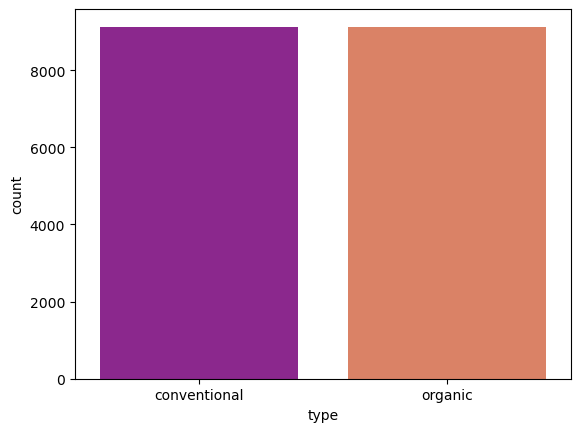

In [20]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
pyplt.show()

In the "type" column we have data for organic and conventional avocados.

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


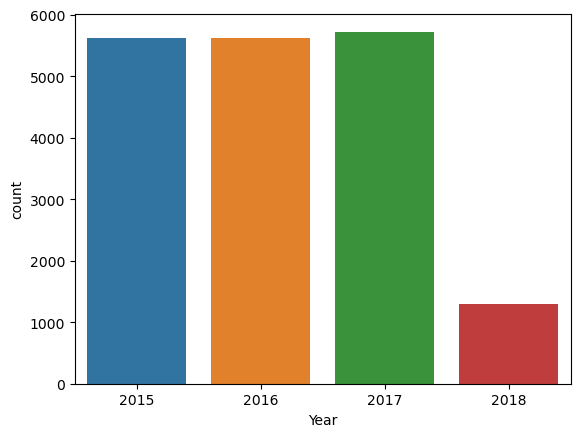

In [21]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
pyplt.show()

In the "Year" column it can be seen that less data is available for the year 2018 .

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


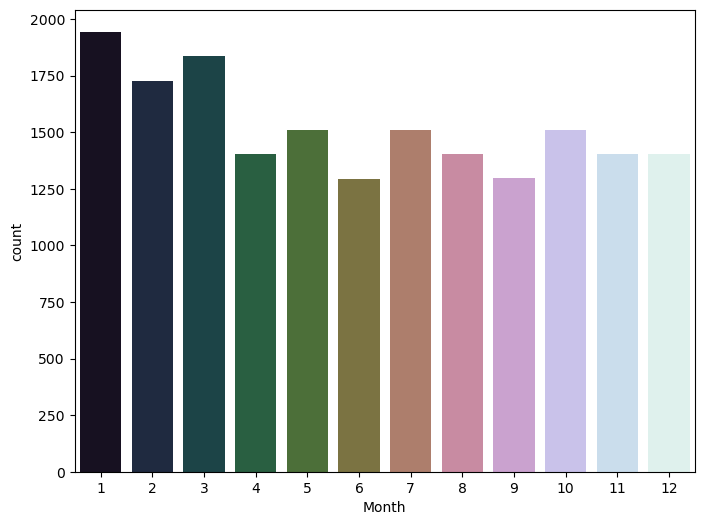

In [22]:
print(df['Month'].value_counts())
pyplt.figure(figsize=(8,6))
sns.countplot(x='Month', data=df, palette="cubehelix")
pyplt.show()

In the Month column the least data is available for the month of June and the maximum concentration is in the month of January.

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Date, dtype: int64


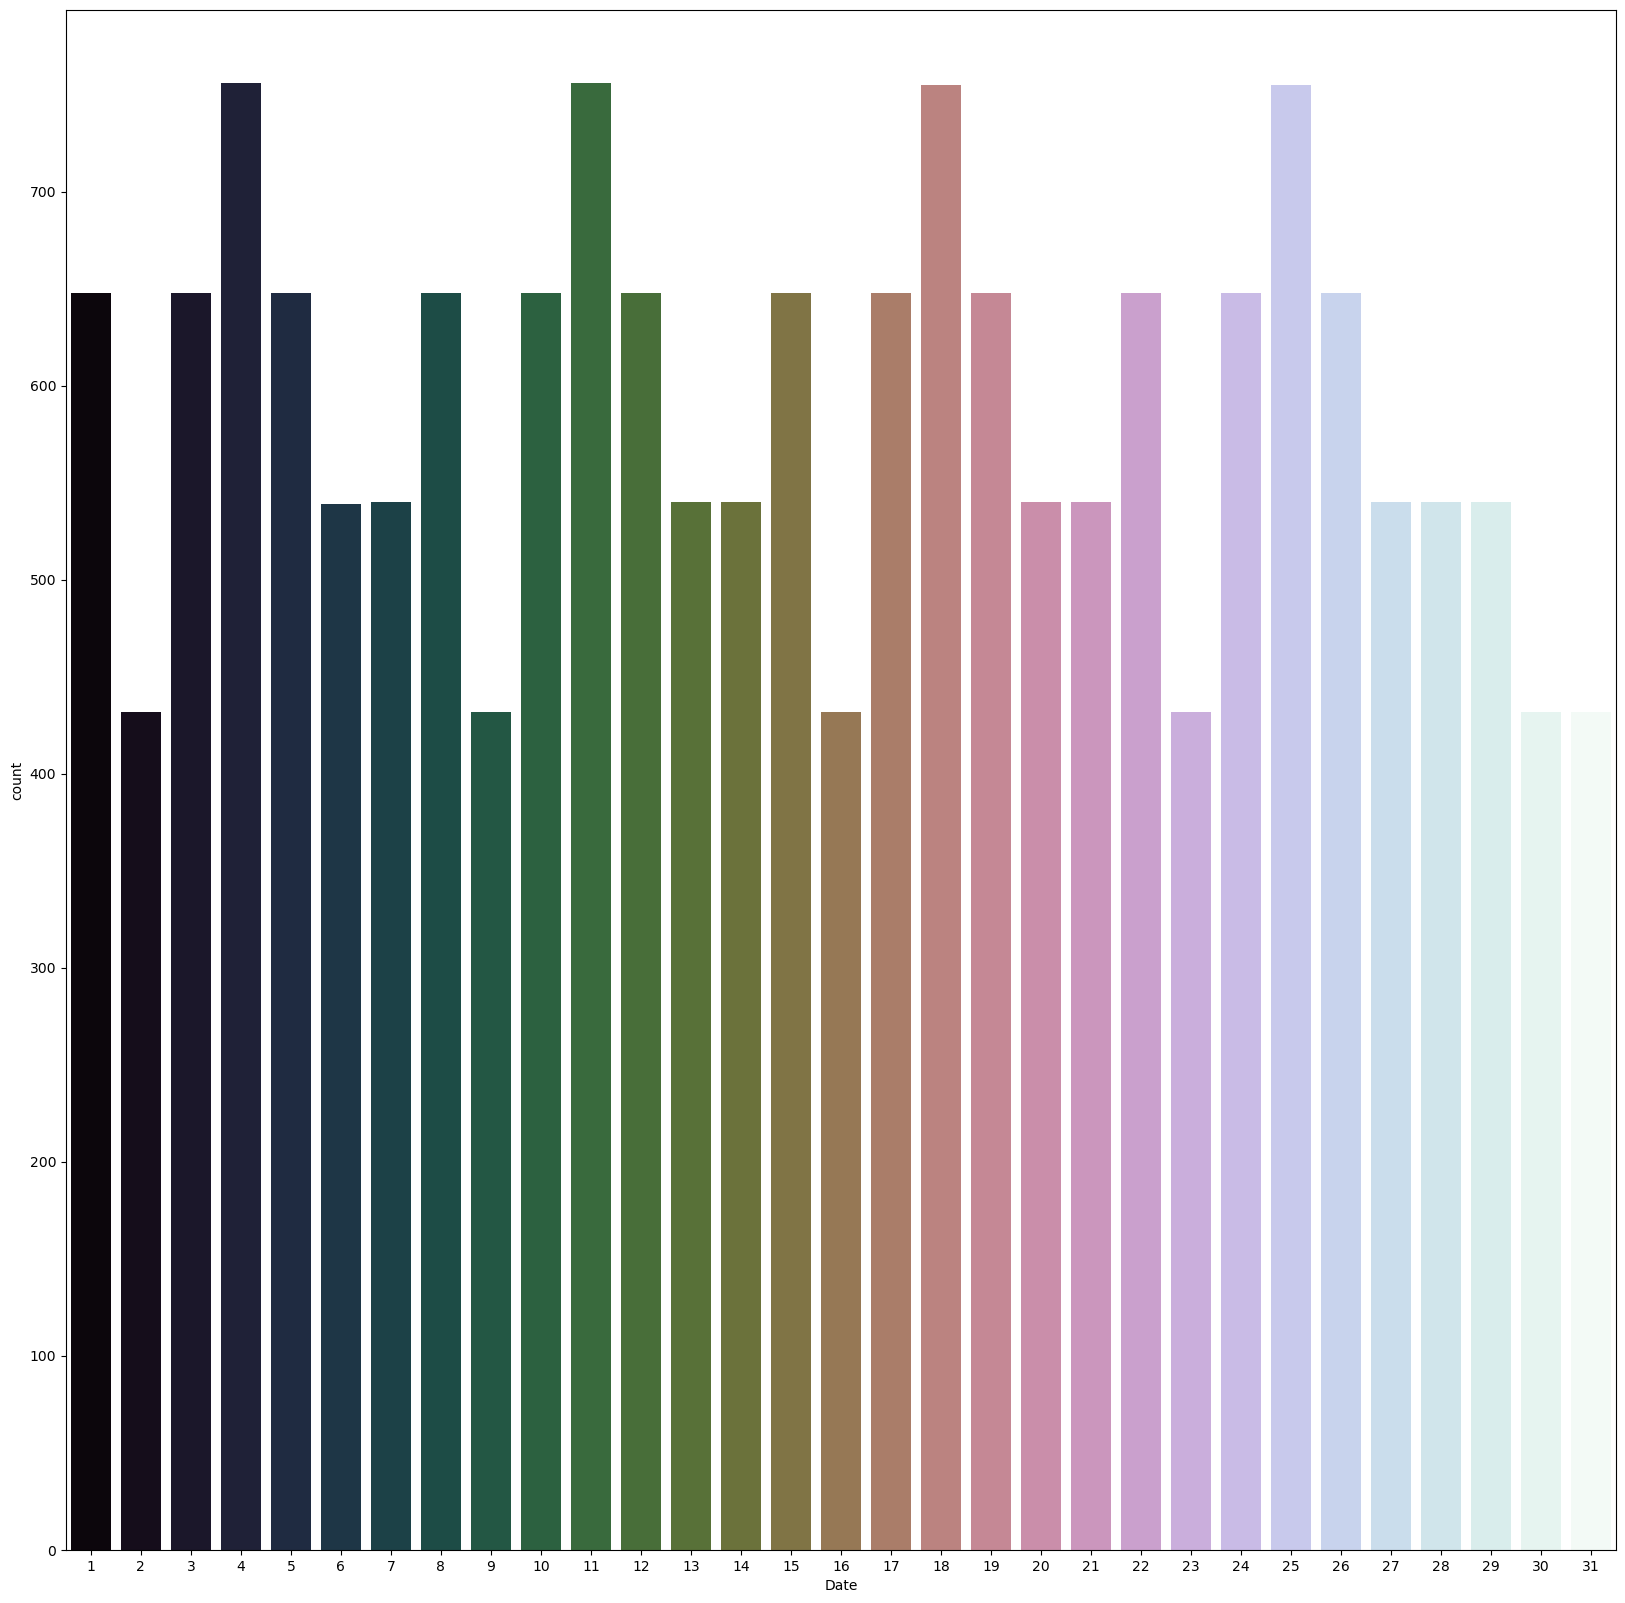

In [23]:
print(df['Date'].value_counts())
pyplt.figure(figsize=(20,20))
sns.countplot(x='Date', data=df, palette="cubehelix")
pyplt.show()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

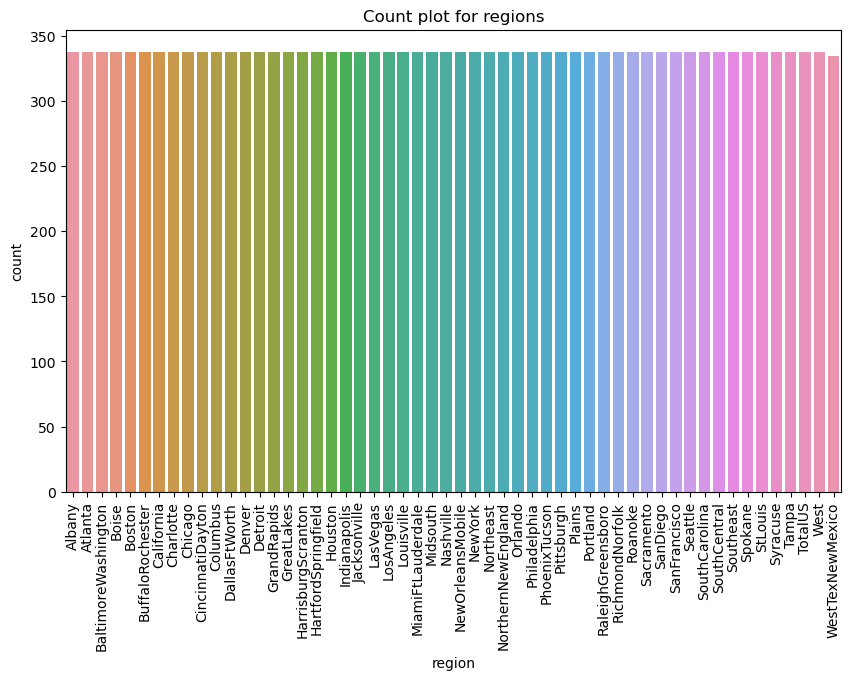

In [24]:
print(df['region'].value_counts())
pyplt.figure(figsize=(10,6))
sns.countplot(df['region'], data=df)
pyplt.title('Count plot for regions')
pyplt.xticks(rotation=90)
pyplt.show()

In the region column data is slightly lower in WestTexNewMexico.

<Figure size 1500x1200 with 0 Axes>

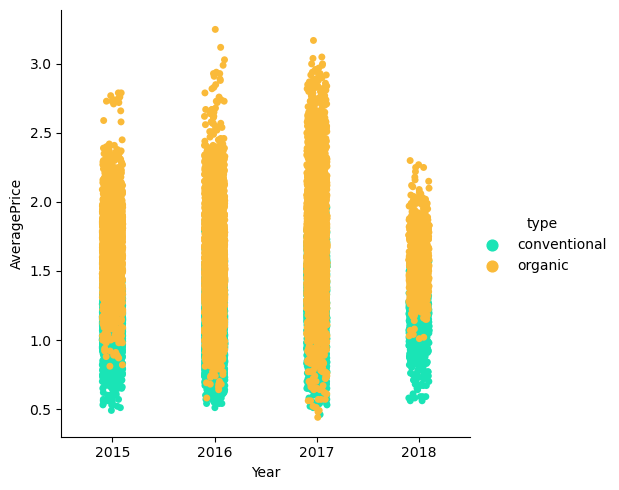

In [25]:
pyplt.figure(figsize=(15,12))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="turbo")
pyplt.show()

In the above depicted plot we can see the average price information as per year and how organic and conventional type of avocados were sold. It is clear that organic avocados are priced higher than the conventional avocados.

<Figure size 1500x1200 with 0 Axes>

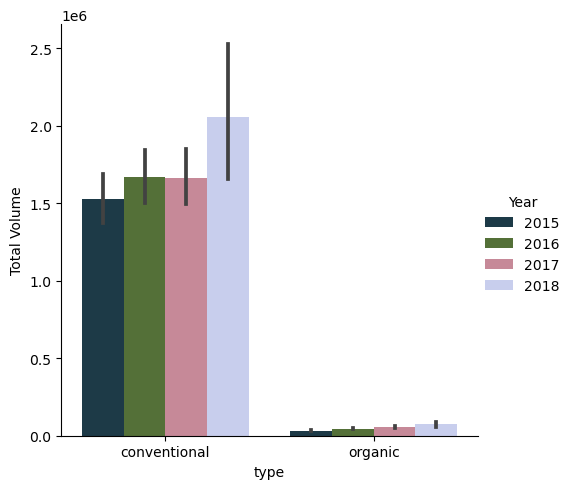

In [26]:
pyplt.figure(figsize=(15,12))
sns.catplot(x="type", y="Total Volume", hue="Year", data=df, kind="bar", palette="cubehelix")
pyplt.show()

In the above plot we can see that total volume for conventional type were high in all 4 years when compared with the organic.

<Figure size 1500x1200 with 0 Axes>

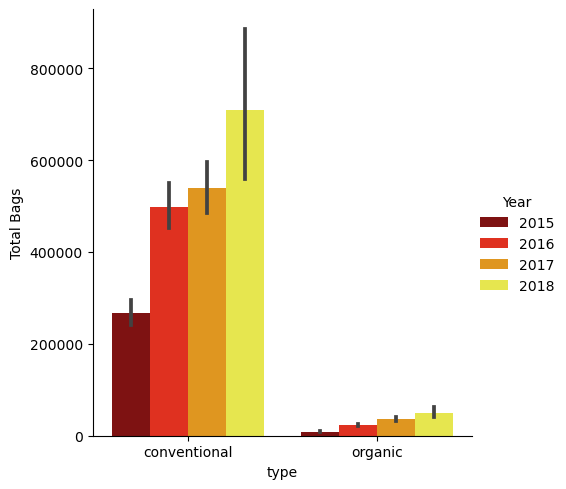

In [27]:
pyplt.figure(figsize=(15,12))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hot")
pyplt.show()

The use of bags is higher for conventional type of avocados over the organic ones as they are sold more.

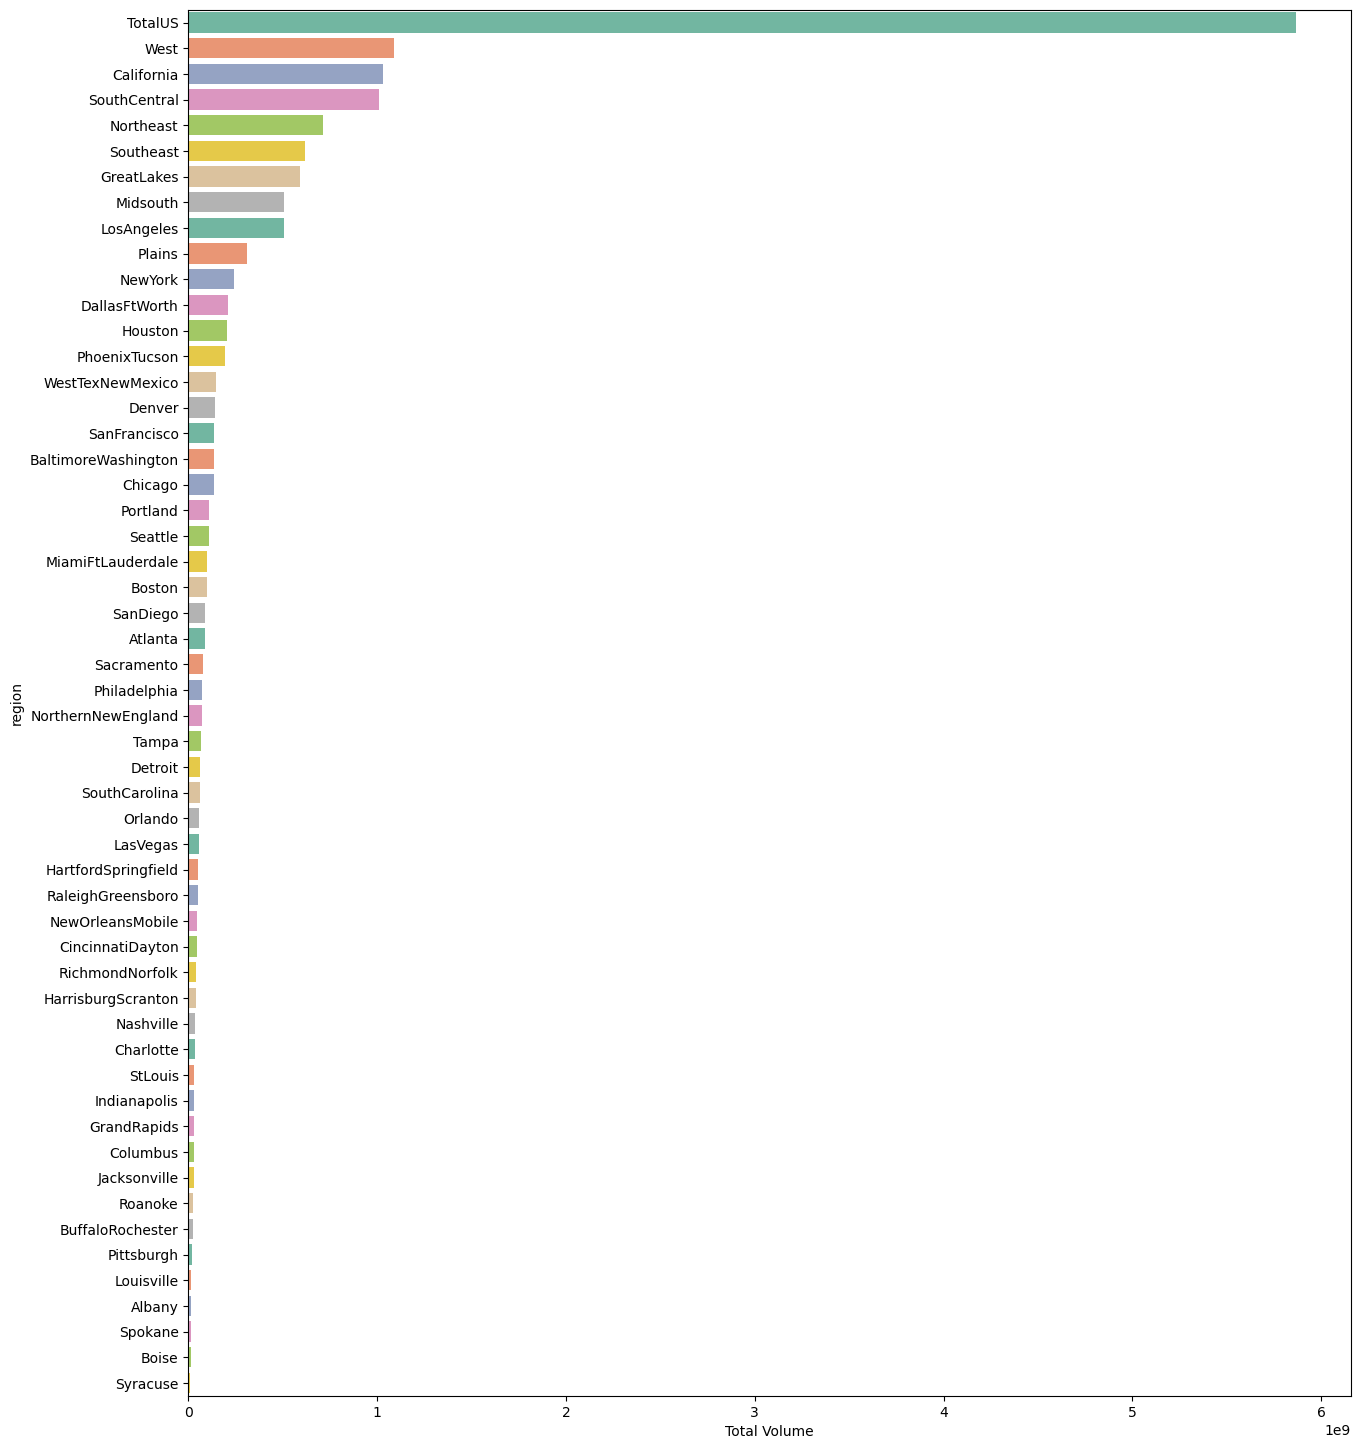

In [28]:
region=df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
pyplt.figure(figsize=(15,18))
sns.barplot(x=region["Total Volume"],y=region["region"], data=df, palette="Set2")
pyplt.show()

The total number of avocados sold from each and every region is very less as compared to the total US area per region.

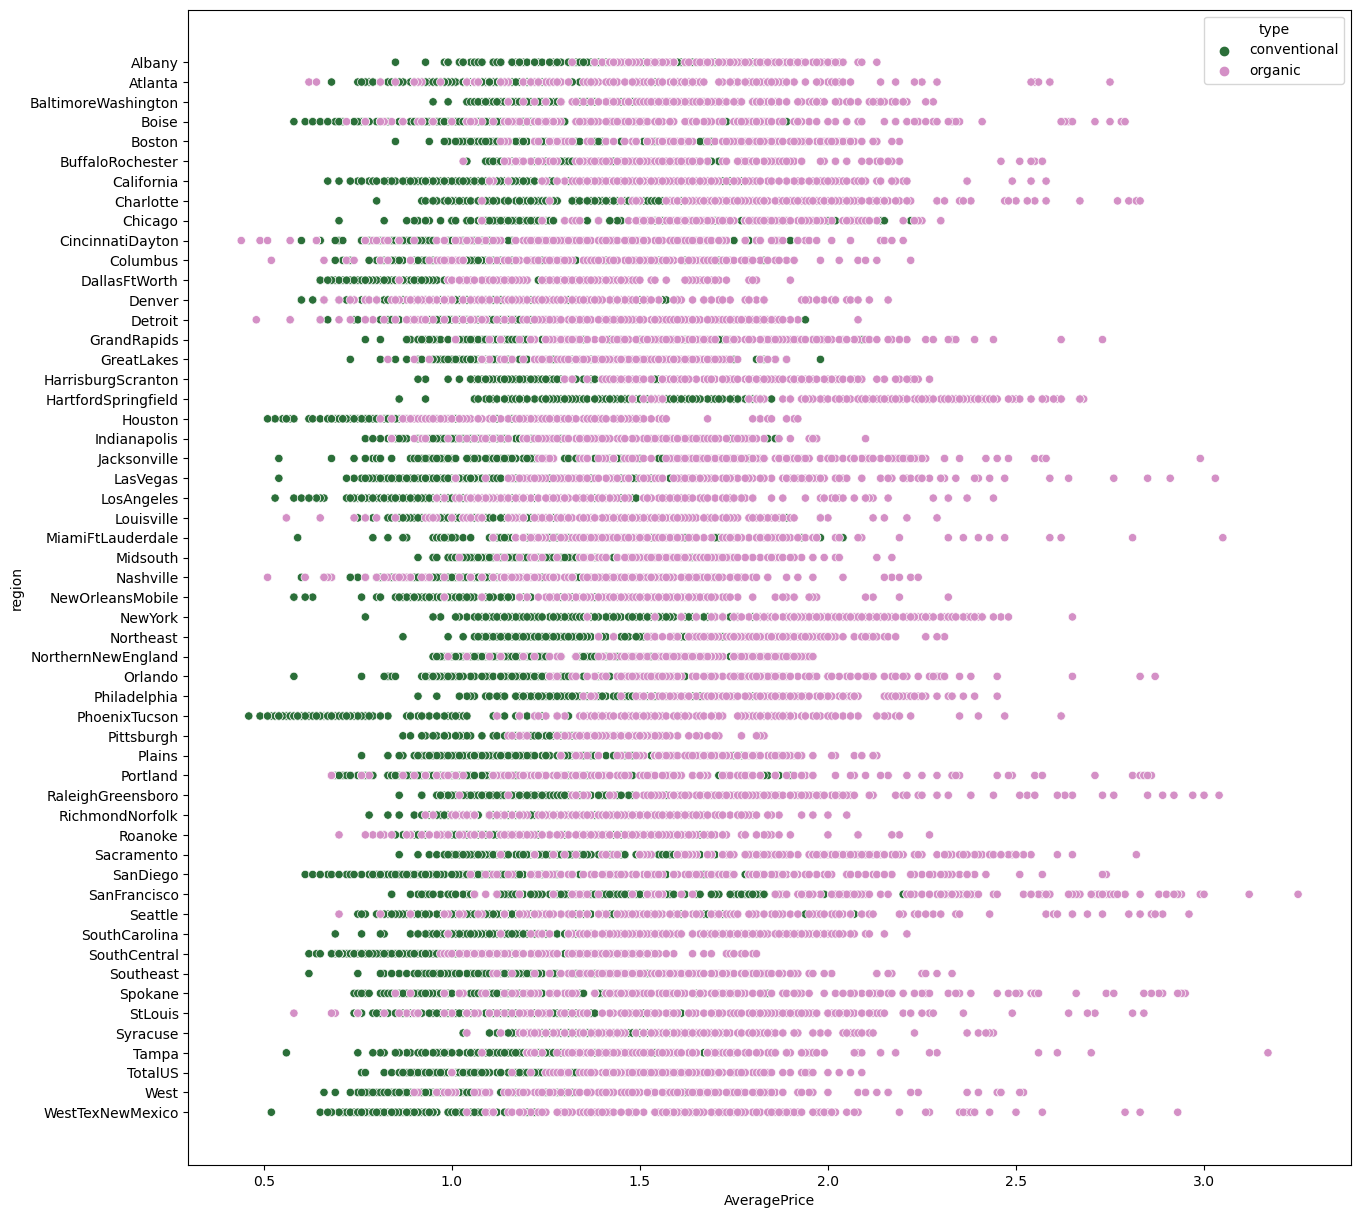

In [29]:
pyplt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice',y='region',hue='type',data=df, palette="cubehelix")
pyplt.show()

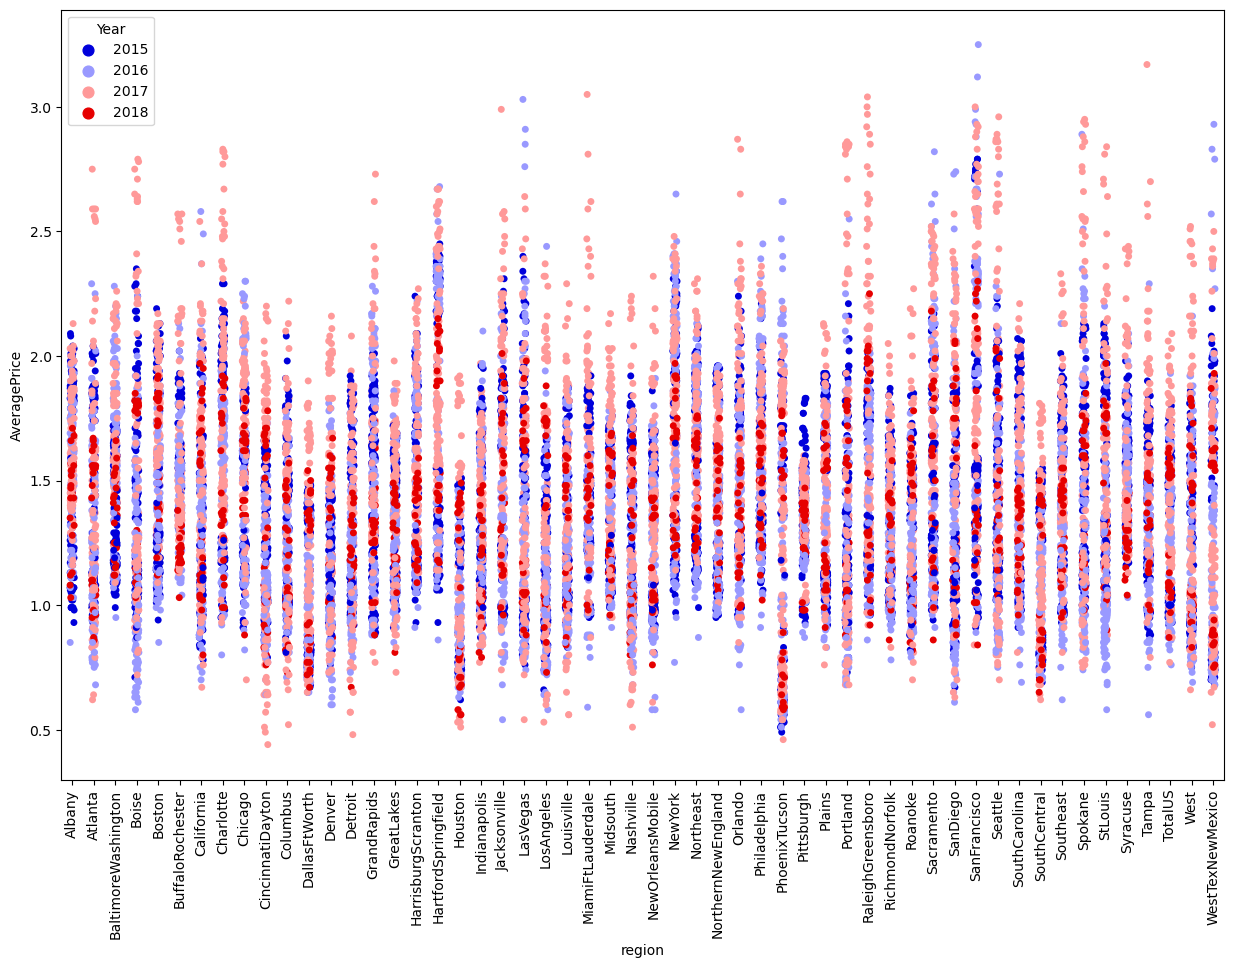

In [30]:
pyplt.figure(figsize=(15,10))
sns.stripplot(x='region',y='AveragePrice',hue='Year',data=df, palette="seismic")
pyplt.xticks(rotation=90)
pyplt.show()

In the above depicted plot we can see the average price of avocados over all the regions in 4 years. It can be interpreted that in the year 2016 and 2017 the avg. price were higher than in the year 2015 and 2018.

In [31]:
df.drop(["4046","4225","4770", "Small Bags","Large Bags", "XLarge Bags"], axis=1, inplace=True)

Dropping the columns named "4046","4225","4770", "Small Bags","Large Bags", "XLarge Bags" to avoid multicolinearity in ur dataset.

# ENCODING

In [32]:
oe=OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


Using the ordinal encoding method we changed the object datatype columns to numeric values for machine learning models.

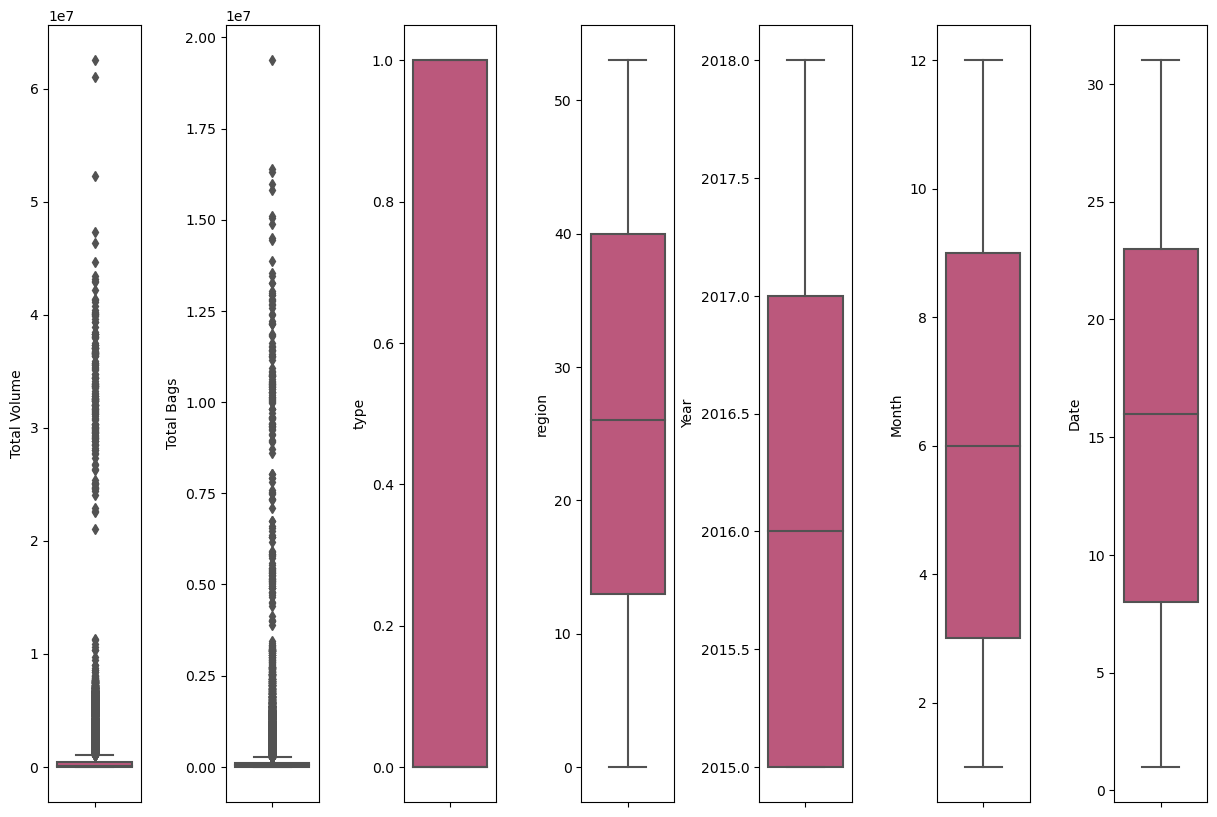

In [33]:
fig, ax=pyplt.subplots(ncols=7, nrows=1, figsize=(12,8))
index=0
features=df.drop("AveragePrice", axis=1)
ax=ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index],palette="plasma")
    index+=1
pyplt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
pyplt.show()

From the boxplot above we can see that some outliers are present in our feature columns "Total Volume" and "Total Bags" we will treat them using Zscore method.

# USING Z SCORE FOR REMOVAL OF OUTLIERS

In [34]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print("Shape of the dataframe before removing outliers: ",df.shape)
print("Shape of the dataframe after removing outliers: ",df1.shape)
print("%age of data lost after outlier removing: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
%age of data lost after outlier removing:  1.7425612362321221


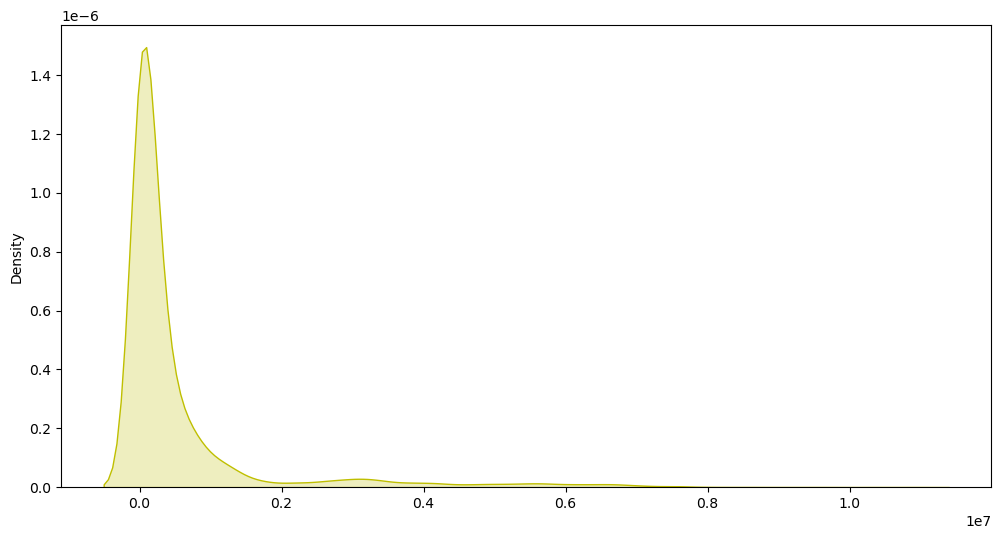

In [35]:
pyplt.figure(figsize=(12,6))
sns.distplot(x=df["Total Volume"], hist=False, color="y",kde_kws={"shade":True})
pyplt.show()

We can see the right skewness in the Total Volume column that had outliers too.

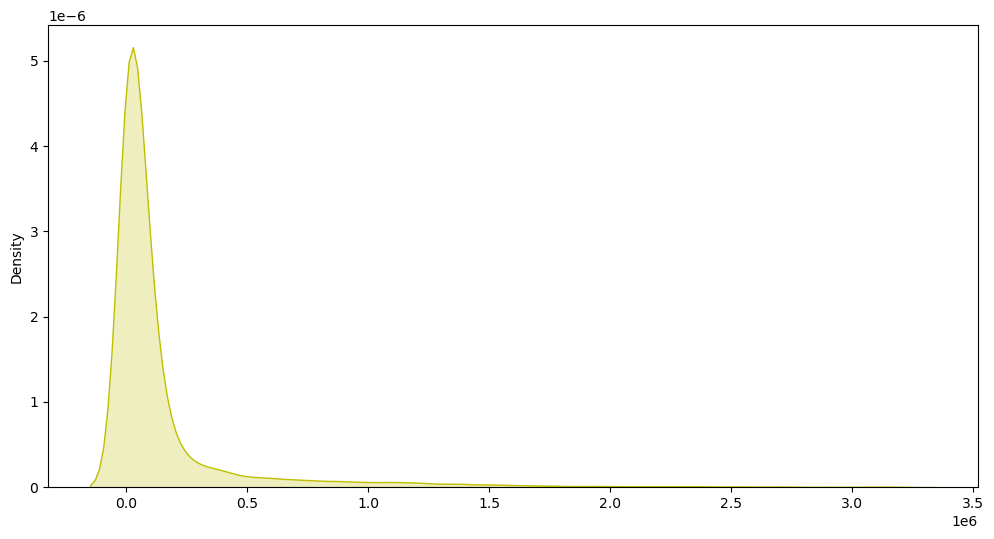

In [36]:
pyplt.figure(figsize=(12,6))
sns.distplot(x=df["Total Bags"], hist=False, color="y",kde_kws={"shade":True})
pyplt.show()

We can see right skewness in the column named Total Bags.

In [37]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
        

Applying the log transformation on our columns to ensure that we do not have skewness in the dataset.

In [38]:
df.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
Date            0.014381
dtype: float64

# SPLITTING THE DATASET INTO 2 VARIABLES FOR FEATURE AND LABEL

In [39]:
X=df.drop('AveragePrice', axis=1)
Y=df['AveragePrice']

# FEATURE SCALING

In [40]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,-1.215795,1.084793,1.063818


# FINDING THE BEST RANDOM STATE FOR BUILDING REGRESSION MODELS

In [41]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    r2=r2_score(Y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        
print("The best r2Score is", maxAccu, "at Random State", maxRS)

The best r2Score is 0.5021238214614996 at Random State 144


# CREATING THE TRAINING AND TESTING DATASETS.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=144)

# MACHINE LERANING MODEL FOR REGRESSION WITH EVALUATION METRICS

In [43]:
def reg(model, X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=708)
    
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    rmse=mean_squared_error(Y_test, pred, squared=False)
    print("RMSE score is= ", rmse)
    
    r2=r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 score is= ", r2)
    
    cv_score=(cross_val_score(model, X,Y, cv=5).mean())*100
    print("Cross Validation Score is = ", cv_score)
    
    result=r2-cv_score
    print("R2 score - Cross validation score is= ", result)

In [44]:
#LINEAR REGRESSION MODEL
model=LinearRegression()
reg(model,X,Y)

RMSE score is=  0.2843241073646302
R2 score is=  47.91662124818624
Cross Validation Score is =  12.299369206677339
R2 score - Cross validation score is=  35.6172520415089


In [45]:
#RIDGE REGRESSION

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE score is=  0.28468212924064606
R2 score is=  47.785371532369666
Cross Validation Score is =  12.572883789963496
R2 score - Cross validation score is=  35.21248774240617


In [46]:
#LASSO REGRESSION

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE score is=  0.39412850641568486
R2 score is=  -0.08004140738024912
Cross Validation Score is =  -116.71934809126752
R2 score - Cross validation score is=  116.63930668388727


In [47]:
#SUPPORT VECTOR REGRESSION

model=SVR(C=1,epsilon=0.2,kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE score is=  0.2628223421424579
R2 score is=  55.4962770108585
Cross Validation Score is =  -17.860820345389936
R2 score - Cross validation score is=  73.35709735624843


In [48]:
#DECISION TREE REGRESSOR

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE score is=  0.34727199177352996
R2 score is=  22.301739279650835
Cross Validation Score is =  -141.40180891546768
R2 score - Cross validation score is=  163.70354819511851


In [49]:
#RANDOM FOREST REGRESSOR

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE score is=  0.2992697102288931
R2 score is=  42.297144200081604
Cross Validation Score is =  -16.408746176885654
R2 score - Cross validation score is=  58.70589037696726


In [50]:
#KNEIGHBORS REGRESSOR

model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE score is=  0.2611651128116074
R2 score is=  56.05574505048683
Cross Validation Score is =  -20.4503894463756
R2 score - Cross validation score is=  76.50613449686243


In [51]:
#GRADIENT BOOSTING REGRESSOR

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE score is=  0.2771917843068981
R2 score is=  50.49688938541868
Cross Validation Score is =  -13.641965486131497
R2 score - Cross validation score is=  64.13885487155018


In [52]:
#ADA BOOST REGRESSOR

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE score is=  0.2731855113353641
R2 score is=  51.91749271525534
Cross Validation Score is =  -2.2062818905596826
R2 score - Cross validation score is=  54.12377460581502


In [53]:
#EXTRA TREE REGRESSOR

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE score is=  0.17848148119792287
R2 score is=  79.47618438995575
Cross Validation Score is =  18.92734927078342
R2 score - Cross validation score is=  60.548835119172324


In [54]:
import sys
!{sys.executable} -m pip install xgboost

In [55]:
#XGB REGRESSOR
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model, X, Y)

RMSE score is=  0.13156329541646664
R2 score is=  88.84829511848271
Cross Validation Score is =  39.48804192771808
R2 score - Cross validation score is=  49.36025319076463


# HYPER PARAMETER TUNING ON BEST MACHINE LEARNING MODEL

In [56]:
#CHOSING THE XGBREGRESSOR
fmod_param={'n_estimators':[200,400,600],
           'gamma':[2.0,3.0,4.0],
           'max_depth':[4,6,8],
           'n_jobs':[-2,-1,1]}

In [57]:
GSCV=GridSearchCV(XGBRegressor(),fmod_param, cv=5)

In [58]:
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [59]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [60]:
GSCV.best_score_

0.7423465479786919

In [61]:
Final_Model=XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_r2=r2_score(Y_test, fmod_pred)*100
print("R2 score for the best model is= ", fmod_r2)

R2 score for the best model is=  78.88427707762189


# SAVING THE FINAL MODEL

In [62]:
filename="Final Mode.pkl"
joblib.dump(Final_Model, filename)

['Final Mode.pkl']

# >>>>>>>>>DONE<<<<<<<<<